<a href="https://colab.research.google.com/github/sayan0506/Prediction-model-for-Diabetes/blob/main/Diabetes_prediction_GRIDSEARCHCV_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing GRIDSEARCHCV for training using PIMA INDIAN DIABETES dataset

In this notebook we will try to implement the gridsearchcv to optimize the SVM(Support Vector Machine) model for classifcation

Note: [SVM tutorial for deep understanding](https://www.youtube.com/watch?v=hCOIMkcsm_g&list=PLNeKWBMsAzboNdqcm4YY9x7Z2s9n9q_Tb)

Pima indian diabetes dataset https://github.com/sayan0506/COVID19-Medical-problem-based-modelling-project/blob/main/Dataset/diabetes.csv


## Module import

In [1]:
import pandas as pd
import numpy as np

## Dataset load
Importing the **Pima indian diabetes** dataset from drive path: **/content/drive/MyDrive/Diabetes dataset/diabetes.csv**

In [2]:
# creating pandas dataframe

df = pd.read_csv('/content/drive/MyDrive/Diabetes dataset/diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
print(f'Columns: \n{df.columns.values}')
print(f'Input features: \n{df.columns.values[:-1]}')
print('')

Columns: 
['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']
Input features: 
['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']



In [5]:
# statistical analysis
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Correlation matrix

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt

# obtaining the correlation matrix
corrmat = df.corr()
# stores the list of features among which the correlation matrix is getting calculated
top_corr_features = corrmat.index 
print(top_corr_features)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


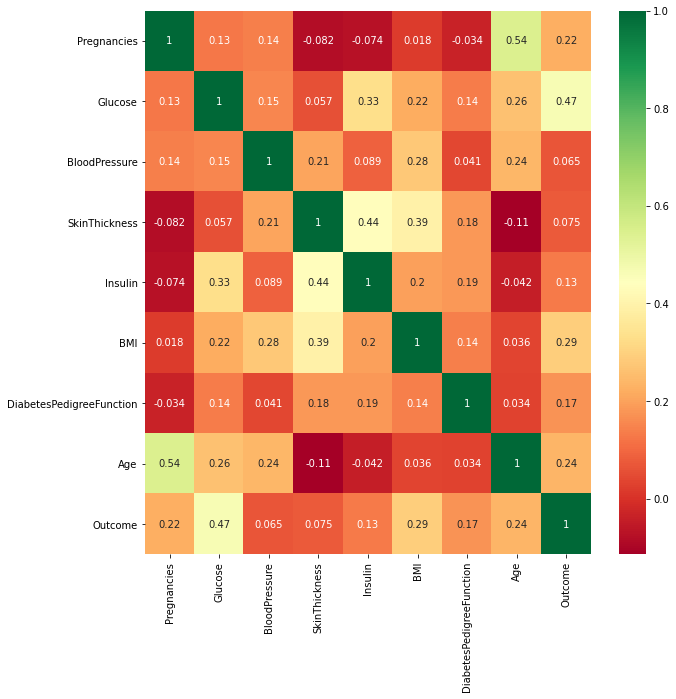

In [7]:
# plot the correlation heatmap

plt.figure(figsize = (10,10))
# the annot = True ensures that, the correlation values will be shown on the heatmap
# cmap ensures the type of heatmap by which the correlation matrix will be represented
# here cmap = "RdYlGn" stands for the heatmap will contain with Red, yellow, green 

# clustermap gives 
g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

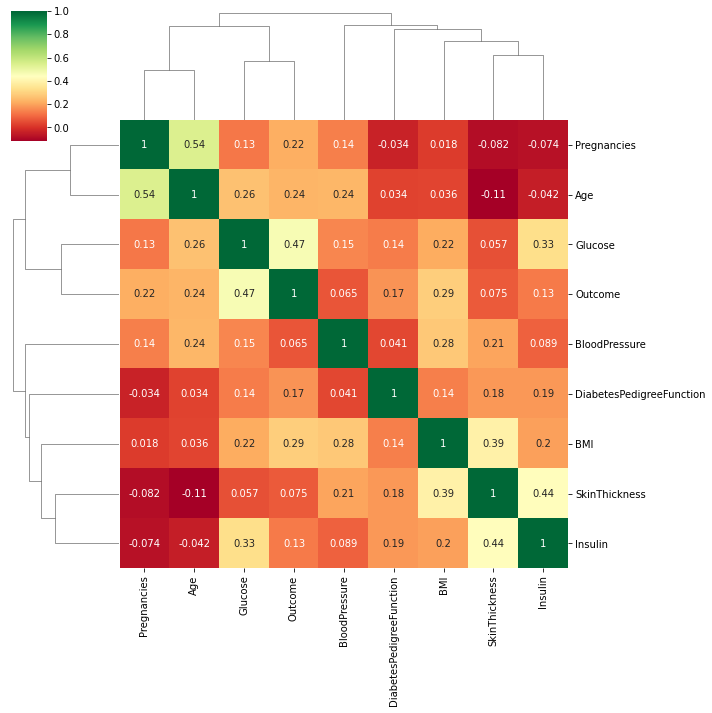

In [8]:
# clustermap gives 
g = sns.clustermap(df[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

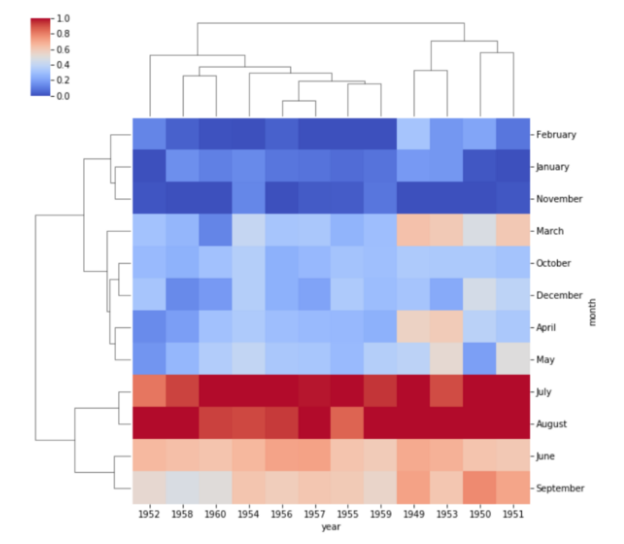

* The .clustermap() method uses a hierarchical clusters to order data by similarity. This reorganizes the data for the rows and columns and displays similar content next to one another for even more depth of understanding the data. 

* As we look at this figure, we see the years are not in order. They have been clustered by similarities. This allows us to quickly identify that July and August are the months where the highest number of passengers were recorded. We also notice that February, January and November seem to record the lowest amount of passengers in the dataset. The tree diagrams on the left and top form groups with the data for additional use.
[Clustermap reference](https://medium.com/@kbrook10/day-4-data-visualization-how-to-use-seaborn-for-heatmaps-bf8070e3846e#:~:text=clustermap()%20method%20uses%20a,depth%20of%20understanding%20the%20data.)

**Note: We can use this clustermap to build structure of autoencoder based neural network model**

# Data Preperation

Use train_test_split of sklearn for creating train and test data for training

In [9]:
# input features matrix for the model
x = df.iloc[:,:8]
# output class matrix
# in column instead of 8:9 or 9(which is invalid entry) use -1, as -1 it takes as valid single argument as column attriuyte in iloc
y = df.iloc[:,-1]
print(x.head())
print(y.head())

# converting to numpy array
x = np.array(x)
y = np.array(y)
print(x[:5])
print(y[:5])

   Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0            6      148             72  ...  33.6                     0.627   50
1            1       85             66  ...  26.6                     0.351   31
2            8      183             64  ...  23.3                     0.672   32
3            1       89             66  ...  28.1                     0.167   21
4            0      137             40  ...  43.1                     2.288   33

[5 rows x 8 columns]
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64
[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]
[1 

In [10]:
print(f'shapes: {x.shape, y.shape}')

shapes: ((768, 8), (768,))


In [11]:
from sklearn.model_selection import train_test_split

# train_test_split using sklearn with test_size = 0.1 of the total size
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 5)

print(f'Train shape {x_train.shape, y_train.shape}')
print(f'Test shape {x_test.shape, y_test.shape}')

Train shape ((691, 8), (691,))
Test shape ((77, 8), (77,))


#### **Feature Scaling**
Normalize or standardize the data

In [12]:
from sklearn.preprocessing import StandardScaler

# object for stdscaler
scl = StandardScaler()
# fitting the standardscaler for standardization
x_train_std = scl.fit_transform(x_train)
x_test_std = scl.fit_transform(x_test)

print(f'standardized samples:\n{x_train_std[:5]}\n{x_test[:5]}')

standardized samples:
[[-1.1283874   1.30435424  0.36154487  0.98339999 -0.71019241  2.22268605
  -0.321945   -0.6021486 ]
 [ 0.92118446  0.24884518 -0.04542317  1.8067649   0.38519641  0.82518752
  -0.084591    0.84792102]
 [ 0.04279652 -0.87063412 -0.19803619  0.09669932 -0.71019241 -0.91224307
  -1.00552452 -1.02863967]
 [-0.83559142 -0.03902092  0.56502889  1.74342914  1.0424297   0.87554783
   2.20350157  0.6773246 ]
 [ 3.84914425  1.33633937  0.15806085  1.3000788   0.28880219  1.12734937
   1.11167317  1.18911388]]
[[6.00e+00 9.20e+01 6.20e+01 3.20e+01 1.26e+02 3.20e+01 8.50e-02 4.60e+01]
 [5.00e+00 1.32e+02 8.00e+01 0.00e+00 0.00e+00 2.68e+01 1.86e-01 6.90e+01]
 [3.00e+00 1.06e+02 7.20e+01 0.00e+00 0.00e+00 2.58e+01 2.07e-01 2.70e+01]
 [4.00e+00 9.90e+01 6.80e+01 3.80e+01 0.00e+00 3.28e+01 1.45e-01 3.30e+01]
 [4.00e+00 9.60e+01 5.60e+01 1.70e+01 4.90e+01 2.08e+01 3.40e-01 2.60e+01]]


# Define SVM model for classification

In [13]:
from sklearn.svm import SVC

# defining the classifier object
# we are using linear kernel, which helps to create linear decision boundary between to classifier clusters
classifier = SVC(kernel = 'linear', random_state = 0)
                 #, max_iter=1000)

# Training without GridsearchCV

In [101]:
# training the model 
classifier.fit(x_train_std, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

# Model Performance

In [102]:
from sklearn.metrics import accuracy_score

predicted = classifier.predict(x_test_std)
print(f'Training accuracy {accuracy_score(classifier.predict(x_train_std), y_train)}')
print(f'Test accuracy {accuracy_score(predicted, y_test)}')

Training accuracy 0.7727930535455861
Test accuracy 0.7922077922077922


In [ ]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x, y)

In [15]:
accuracy = grid_search.best_score_
accuracy

0.7668530020703933

In [18]:
grid_search.best_params_

{'C': 10, 'kernel': 'linear'}

In [40]:
classifier_new = SVC(kernel = 'linear', gamma=1.0, C=10)
classifier_new.fit(x_train_std, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
from sklearn.metrics import accuracy_score

predicted = classifier.predict(x_test_std)
print(f'Training accuracy {accuracy_score(classifier.predict(x_train_std), y_train)}')
print(f'Test accuracy {accuracy_score(predicted, y_test)}')

Training accuracy 0.7727930535455861
Test accuracy 0.7922077922077922


**Note here both the mean accuracy for K-fold and Stratified-kfold are same, but this may affect when we have huge imbalance dataset, (Though there our first and foremost approach would be to solve the imbalance problem)**